In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

df = pd.read_csv("HW3_Credit Card Dataset.csv", header=0)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [77]:
df['CREDIT_LIMIT'].unique()

array([ 1000.      ,  7000.      ,  7500.      ,  1200.      ,
        1800.      , 13500.      ,  2300.      , 11000.      ,
        2000.      ,  3000.      ,  8000.      ,  2500.      ,
       13000.      ,  4000.      , 11250.      ,  9000.      ,
        6000.      ,  1700.      , 10500.      ,  6900.      ,
        5000.      ,  4500.      ,  1500.      ,  8500.      ,
        2400.      ,  4200.      ,  3300.      , 12000.      ,
        3500.      ,  6500.      ,  1600.      ,  4150.      ,
        1850.      ,  6250.      ,  2250.      ,  9500.      ,
       16500.      ,  5700.      ,  5500.      , 17000.      ,
        3200.      , 19000.      ,  2800.      , 18000.      ,
       21500.      , 10000.      , 20000.      ,  7900.      ,
       15000.      , 12500.      , 14000.      ,  5300.      ,
         900.      ,  6150.      , 11500.      , 23000.      ,
        2700.      , 14500.      , 19500.      ,  1400.      ,
        2900.      ,  1950.      ,  7200.      , 10950.

In [4]:
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(round(df['CREDIT_LIMIT'].mean()))

In [79]:
df['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [5]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

In [6]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449400,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


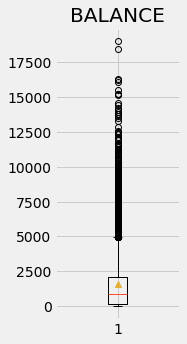

In [83]:
plt.figure(figsize=(2,5))
plt.boxplot(df['BALANCE'],showmeans=True)
plt.title('BALANCE')
plt.show()

In [8]:
df.corr()['TENURE']

BALANCE                             0.072692
BALANCE_FREQUENCY                   0.119776
PURCHASES                           0.086288
ONEOFF_PURCHASES                    0.064150
INSTALLMENTS_PURCHASES              0.086143
CASH_ADVANCE                       -0.068312
PURCHASES_FREQUENCY                 0.061506
ONEOFF_PURCHASES_FREQUENCY          0.082466
PURCHASES_INSTALLMENTS_FREQUENCY    0.073275
CASH_ADVANCE_FREQUENCY             -0.133372
CASH_ADVANCE_TRX                   -0.043421
PURCHASES_TRX                       0.121874
CREDIT_LIMIT                        0.139035
PAYMENTS                            0.106136
MINIMUM_PAYMENTS                    0.057257
PRC_FULL_PAYMENT                   -0.016486
TENURE                              1.000000
Name: TENURE, dtype: float64

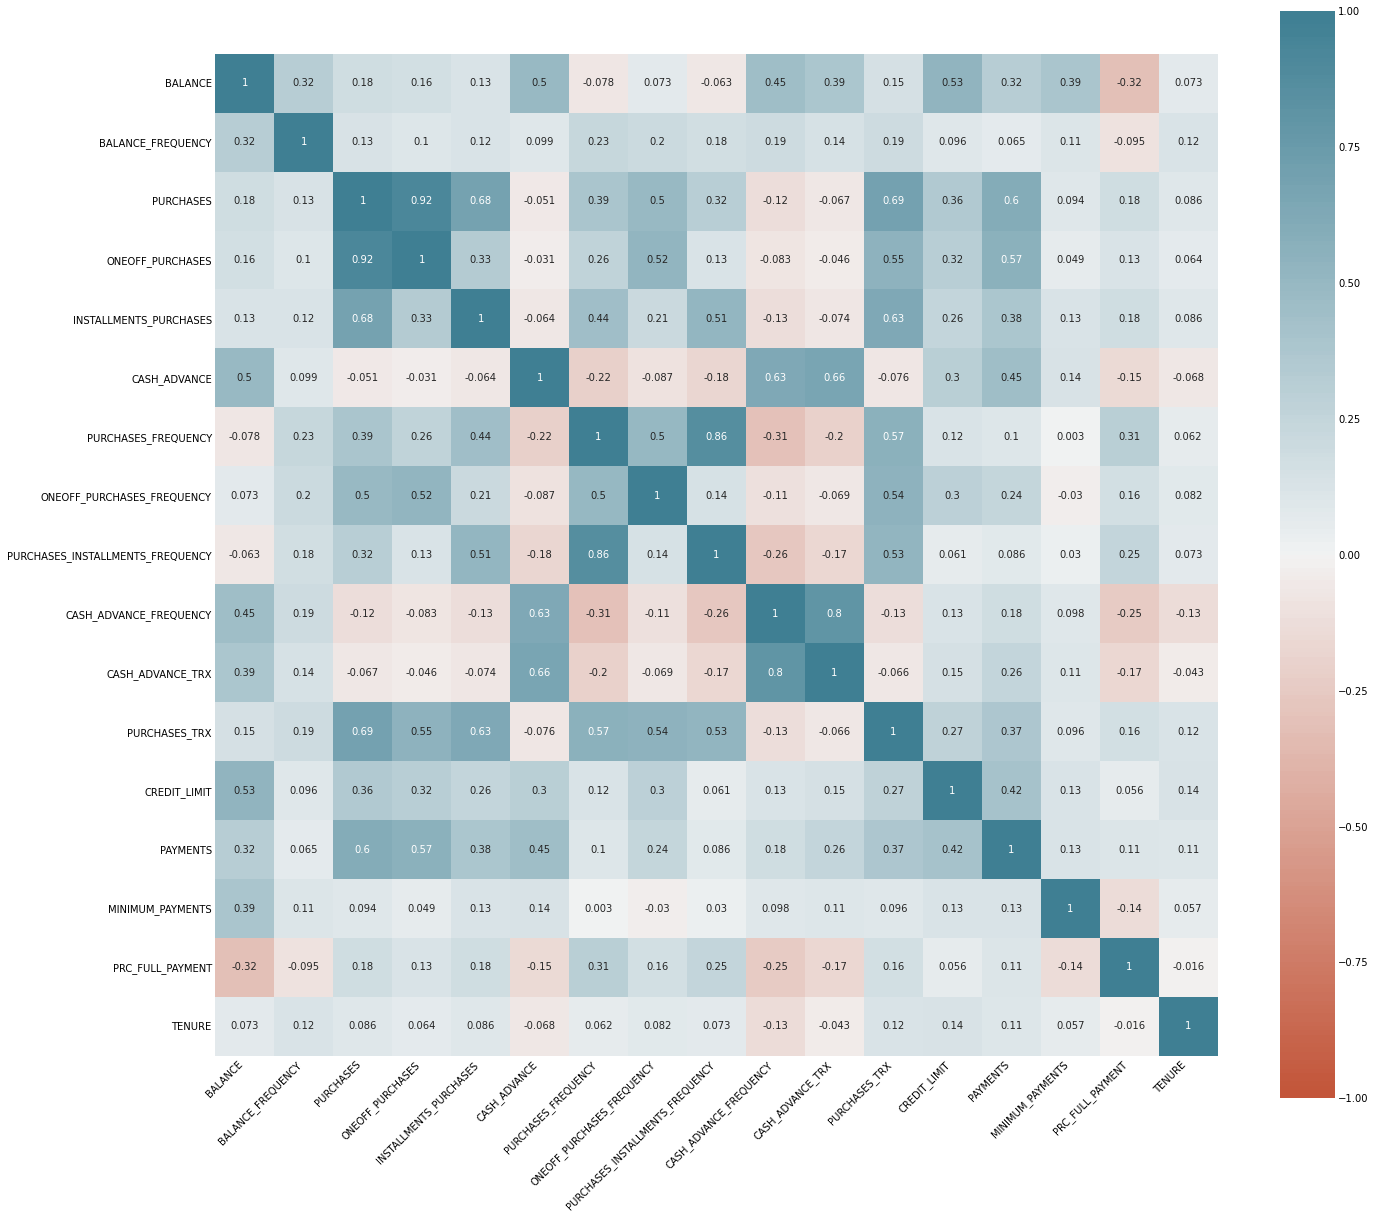

In [9]:
import seaborn as sns

corr = df.loc[:, 'BALANCE':'TENURE'].corr()

plt.figure(figsize=(20, 20))

ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [15]:
df = df.drop(columns = ['CUST_ID'])

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

#原本維度
print(scaled_data.shape)

#轉型後維度
print(x_pca.shape)

(8950, 17)
(8950, 2)


Text(0, 0.5, 'Second Principle Component')

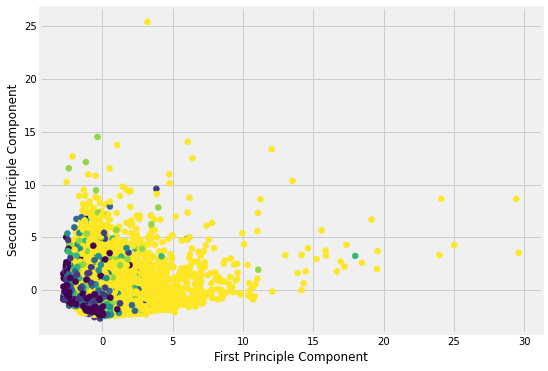

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['TENURE'])

plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [22]:
pca.components_

array([[ 0.10107734,  0.12004347,  0.41164153,  0.34640708,  0.33681416,
        -0.02334315,  0.32149276,  0.29463307,  0.27470978, -0.08913903,
        -0.04865397,  0.3906955 ,  0.21166304,  0.26624892,  0.06035132,
         0.13211229,  0.08102049],
       [ 0.40395848,  0.13053666,  0.04103829,  0.06287163, -0.01853136,
         0.43924134, -0.19077958, -0.01792276, -0.17860126,  0.43408208,
         0.41973416, -0.01939638,  0.23867702,  0.25747598,  0.16696917,
        -0.19002535, -0.00432632]])

In [23]:
df_comp = pd.DataFrame(pca.components_, columns = df.columns)

In [28]:
df_comp.corr()['TENURE']

BALANCE                            -1.0
BALANCE_FREQUENCY                  -1.0
PURCHASES                           1.0
ONEOFF_PURCHASES                    1.0
INSTALLMENTS_PURCHASES              1.0
CASH_ADVANCE                       -1.0
PURCHASES_FREQUENCY                 1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
CASH_ADVANCE_FREQUENCY             -1.0
CASH_ADVANCE_TRX                   -1.0
PURCHASES_TRX                       1.0
CREDIT_LIMIT                       -1.0
PAYMENTS                            1.0
MINIMUM_PAYMENTS                   -1.0
PRC_FULL_PAYMENT                    1.0
TENURE                              1.0
Name: TENURE, dtype: float64

偏度(Skewness): 2.39, 峰度(Kurtosis): 7.67


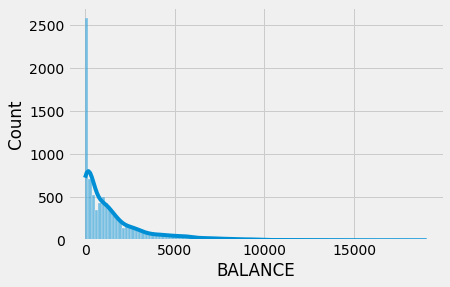

In [86]:
skewness = round(df['BALANCE'].skew(), 2)
kurtosis = round(df['BALANCE'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['BALANCE'], kde=True)
plt.show()

偏度(Skewness): 0.83, 峰度(Kurtosis): 0.33


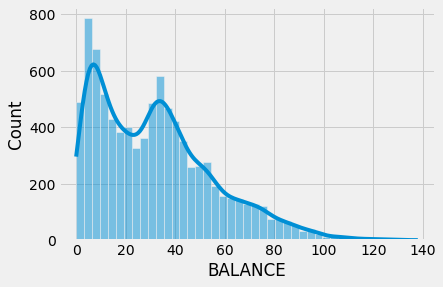

In [87]:
BALANCE = df['BALANCE']**(1/2)
# skewness 與 kurtosis
skewness = round(BALANCE.skew(), 2)
kurtosis = round(BALANCE.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(BALANCE, kde=True)
plt.show()

偏度(Skewness): 8.14, 峰度(Kurtosis): 111.39


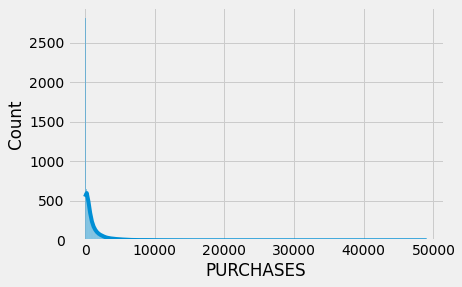

In [88]:
skewness = round(df['PURCHASES'].skew(), 2)
kurtosis = round(df['PURCHASES'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['PURCHASES'], kde=True)
plt.show()

偏度(Skewness): 0.47, 峰度(Kurtosis): 0.45


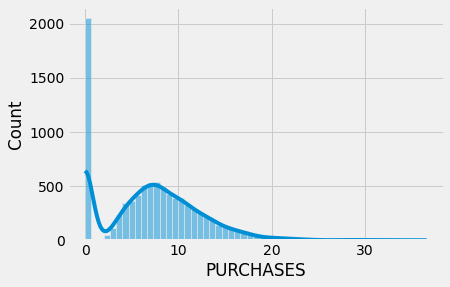

In [89]:
PURCHASES = df['PURCHASES']**(1/3)
# skewness 與 kurtosis
skewness = round(PURCHASES.skew(), 2)
kurtosis = round(PURCHASES.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(PURCHASES, kde=True)
plt.show()

偏度(Skewness): 10.05, 峰度(Kurtosis): 164.19


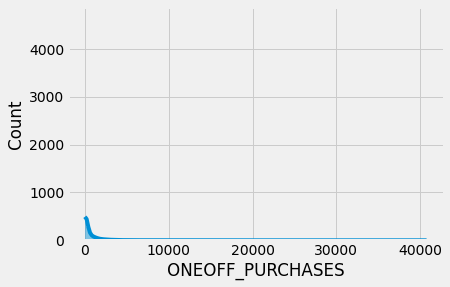

In [90]:
skewness = round(df['ONEOFF_PURCHASES'].skew(), 2)
kurtosis = round(df['ONEOFF_PURCHASES'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['ONEOFF_PURCHASES'], kde=True)
plt.show()

偏度(Skewness): 0.96, 峰度(Kurtosis): 0.58


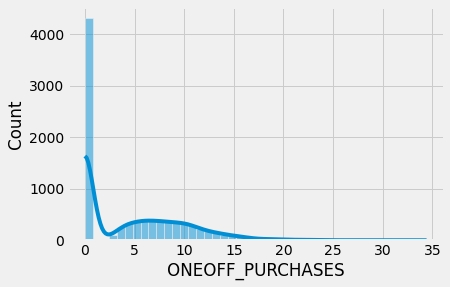

In [91]:
ONEOFF_PURCHASES = df['ONEOFF_PURCHASES']**(1/3)
# skewness 與 kurtosis
skewness = round(ONEOFF_PURCHASES.skew(), 2)
kurtosis = round(ONEOFF_PURCHASES.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(ONEOFF_PURCHASES, kde=True)
plt.show()

偏度(Skewness): 7.3, 峰度(Kurtosis): 96.58


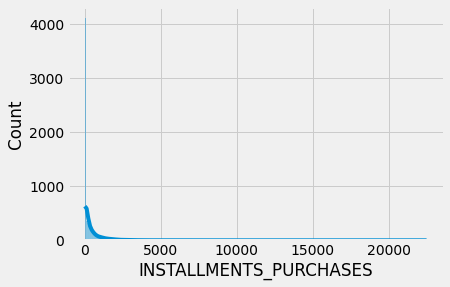

In [92]:
skewness = round(df['INSTALLMENTS_PURCHASES'].skew(), 2)
kurtosis = round(df['INSTALLMENTS_PURCHASES'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['INSTALLMENTS_PURCHASES'], kde=True)
plt.show()

偏度(Skewness): 1.55, 峰度(Kurtosis): 4.03


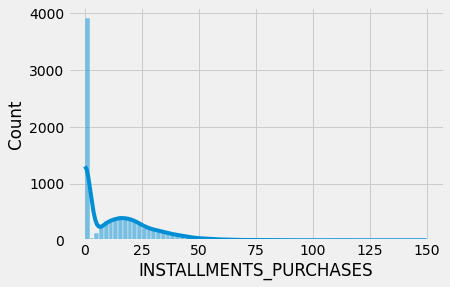

In [93]:
INSTALLMENTS_PURCHASES = df['INSTALLMENTS_PURCHASES']**(1/2)
# skewness 與 kurtosis
skewness = round(INSTALLMENTS_PURCHASES.skew(), 2)
kurtosis = round(INSTALLMENTS_PURCHASES.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(INSTALLMENTS_PURCHASES, kde=True)
plt.show()

偏度(Skewness): 5.17, 峰度(Kurtosis): 52.9


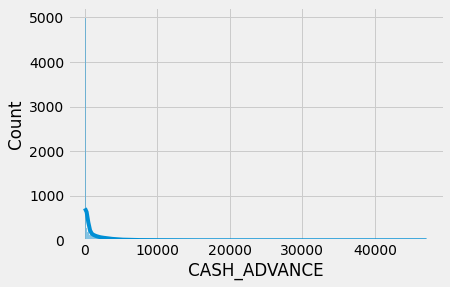

In [94]:
skewness = round(df['CASH_ADVANCE'].skew(), 2)
kurtosis = round(df['CASH_ADVANCE'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['CASH_ADVANCE'], kde=True)
plt.show()

偏度(Skewness): 1.49, 峰度(Kurtosis): 2.34


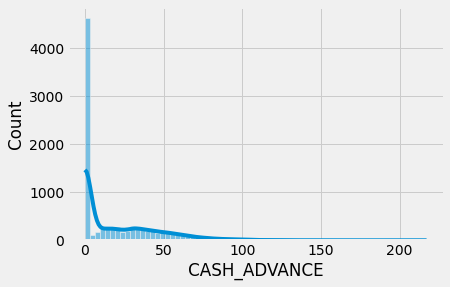

In [95]:
CASH_ADVANCE = df['CASH_ADVANCE']**(1/2)
# skewness 與 kurtosis
skewness = round(CASH_ADVANCE.skew(), 2)
kurtosis = round(CASH_ADVANCE.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(CASH_ADVANCE, kde=True)
plt.show()

偏度(Skewness): 5.72, 峰度(Kurtosis): 61.65


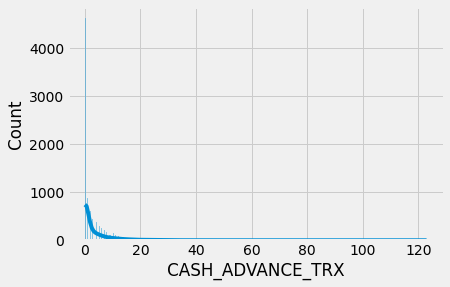

In [96]:
skewness = round(df['CASH_ADVANCE_TRX'].skew(), 2)
kurtosis = round(df['CASH_ADVANCE_TRX'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['CASH_ADVANCE_TRX'], kde=True)
plt.show()

偏度(Skewness): 1.42, 峰度(Kurtosis): 2.49


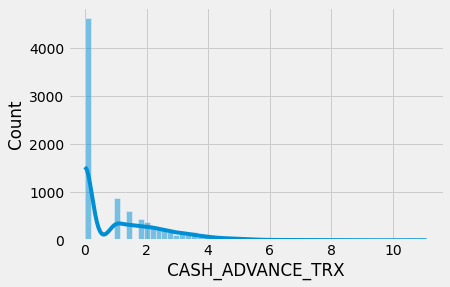

In [97]:
CASH_ADVANCE_TRX = df['CASH_ADVANCE_TRX']**(1/2)
# skewness 與 kurtosis
skewness = round(CASH_ADVANCE_TRX.skew(), 2)
kurtosis = round(CASH_ADVANCE_TRX.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(CASH_ADVANCE_TRX, kde=True)
plt.show()

偏度(Skewness): 4.63, 峰度(Kurtosis): 34.79


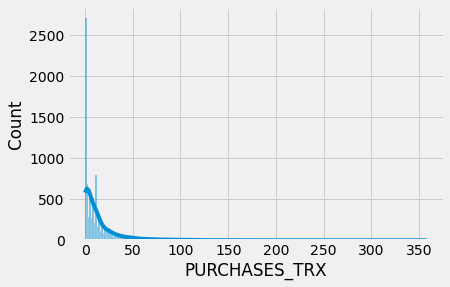

In [98]:
skewness = round(df['PURCHASES_TRX'].skew(), 2)
kurtosis = round(df['PURCHASES_TRX'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['PURCHASES_TRX'], kde=True)
plt.show()

偏度(Skewness): 1.19, 峰度(Kurtosis): 2.44


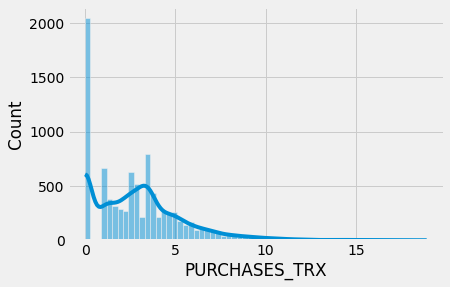

In [99]:
PURCHASES_TRX = df['PURCHASES_TRX']**(1/2)
# skewness 與 kurtosis
skewness = round(PURCHASES_TRX.skew(), 2)
kurtosis = round(PURCHASES_TRX.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(PURCHASES_TRX, kde=True)
plt.show()

偏度(Skewness): 1.52, 峰度(Kurtosis): 2.84


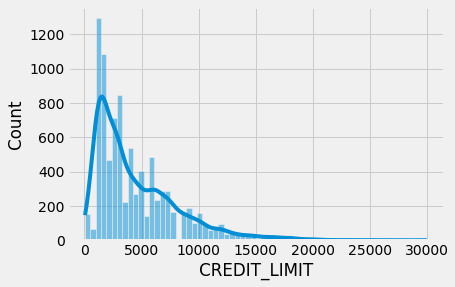

In [100]:
skewness = round(df['CREDIT_LIMIT'].skew(), 2)
kurtosis = round(df['CREDIT_LIMIT'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['CREDIT_LIMIT'], kde=True)
plt.show()

偏度(Skewness): 0.68, 峰度(Kurtosis): -0.1


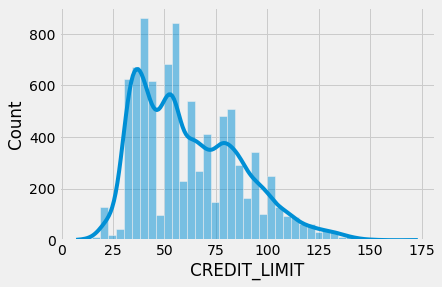

In [101]:
CREDIT_LIMIT = df['CREDIT_LIMIT']**(1/2)
# skewness 與 kurtosis
skewness = round(CREDIT_LIMIT.skew(), 2)
kurtosis = round(CREDIT_LIMIT.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(CREDIT_LIMIT, kde=True)
plt.show()

偏度(Skewness): 5.91, 峰度(Kurtosis): 54.77


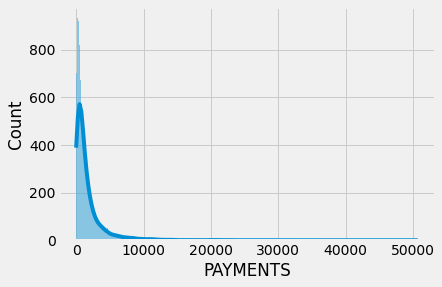

In [102]:
skewness = round(df['PAYMENTS'].skew(), 2)
kurtosis = round(df['PAYMENTS'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['PAYMENTS'], kde=True)
plt.show()

偏度(Skewness): 0.89, 峰度(Kurtosis): 2.38


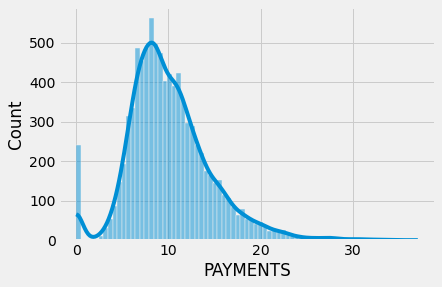

In [103]:
PAYMENTS = df['PAYMENTS']**(1/3)
# skewness 與 kurtosis
skewness = round(PAYMENTS.skew(), 2)
kurtosis = round(PAYMENTS.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(PAYMENTS, kde=True)
plt.show()

偏度(Skewness): 13.87, 峰度(Kurtosis): 294.38


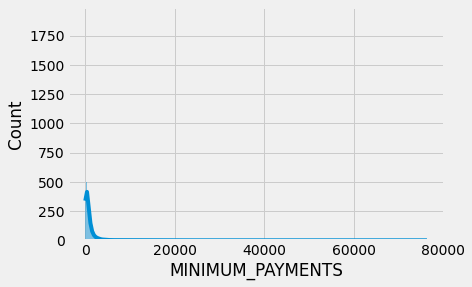

In [104]:
skewness = round(df['MINIMUM_PAYMENTS'].skew(), 2)
kurtosis = round(df['MINIMUM_PAYMENTS'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

sns.histplot(df['MINIMUM_PAYMENTS'], kde=True)
plt.show()

偏度(Skewness): 2.15, 峰度(Kurtosis): 9.21


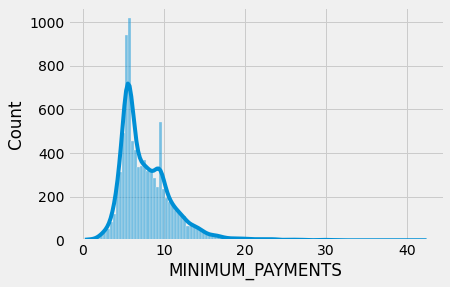

In [105]:
MINIMUM_PAYMENTS = df['MINIMUM_PAYMENTS']**(1/3)
# skewness 與 kurtosis
skewness = round(MINIMUM_PAYMENTS.skew(), 2)
kurtosis = round(MINIMUM_PAYMENTS.kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(MINIMUM_PAYMENTS, kde=True)
plt.show()

In [106]:
df['BALANCE'] = df['BALANCE']**(1/2)
df['PURCHASES'] = df['PURCHASES']**(1/3)
df['ONEOFF_PURCHASES'] = df['ONEOFF_PURCHASES']**(1/3)
df['INSTALLMENTS_PURCHASES'] = df['INSTALLMENTS_PURCHASES']**(1/2)
df['CASH_ADVANCE'] = df['CASH_ADVANCE']**(1/2)
df['CASH_ADVANCE_TRX'] = df['CASH_ADVANCE_TRX']**(1/2)
df['PURCHASES_TRX'] = df['PURCHASES_TRX']**(1/2)
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT']**(1/2)
df['PAYMENTS'] = df['PAYMENTS']**(1/3)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS']**(1/3)

In [107]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,6.395369,0.818182,4.569298,0.000000,9.767292,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,1.414214,31.622777,5.865547,5.186426,0.000000,12
1,C10002,56.590347,0.909091,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.250000,2.0,0.000000,83.666003,16.009152,10.235542,0.222222,12
2,C10003,49.951465,1.000000,9.178217,9.178217,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,8.536483,8.560286,0.000000,12
3,C10004,40.824877,0.636364,11.444598,11.444598,0.000000,14.345313,0.083333,0.083333,0.000000,0.083333,1.0,1.000000,86.602540,0.000000,9.525165,0.000000,12
4,C10005,28.595705,1.000000,2.519842,2.519842,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.000000,34.641016,8.786475,6.255547,0.000000,12


In [108]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,31.780551,0.877271,7.053038,4.504024,13.021440,18.494035,0.490351,0.202458,0.364437,0.135144,1.102261,2.879521,62.139544,10.141503,7.868581,0.153715,11.517318
std,23.548531,0.236904,5.254079,5.202814,15.541452,25.237134,0.401371,0.298336,0.397448,0.200121,1.426210,2.533557,25.163411,4.479892,3.483280,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.071068,0.000000,0.267601,0.000000,6.000000
25%,11.326160,0.888889,3.409516,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,40.000000,7.263913,5.548959,0.000000,12.000000
50%,29.553091,1.000000,7.122208,3.361975,9.433981,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,2.645751,54.772256,9.498251,6.949489,0.000000,12.000000
75%,45.322621,1.000000,10.354392,8.327093,21.648037,33.373959,0.916667,0.300000,0.750000,0.222222,2.000000,4.123106,80.622577,12.388088,9.525165,0.142857,12.000000
max,137.996879,1.000000,36.602905,34.415110,150.000000,217.111059,1.000000,1.000000,1.000000,1.500000,11.090537,18.920888,173.205081,37.016667,42.433568,1.000000,12.000000


In [109]:
df.corr()['TENURE']

BALANCE                             0.079357
BALANCE_FREQUENCY                   0.119776
PURCHASES                           0.120067
ONEOFF_PURCHASES                    0.094812
INSTALLMENTS_PURCHASES              0.110059
CASH_ADVANCE                       -0.097594
PURCHASES_FREQUENCY                 0.061506
ONEOFF_PURCHASES_FREQUENCY          0.082466
PURCHASES_INSTALLMENTS_FREQUENCY    0.073275
CASH_ADVANCE_FREQUENCY             -0.133372
CASH_ADVANCE_TRX                   -0.074115
PURCHASES_TRX                       0.147550
CREDIT_LIMIT                        0.160347
PAYMENTS                            0.197619
MINIMUM_PAYMENTS                    0.117889
PRC_FULL_PAYMENT                   -0.016486
TENURE                              1.000000
Name: TENURE, dtype: float64

In [113]:
data_df = df.drop(columns = ['TENURE', 'CUST_ID'])

X = data_df
y = df['TENURE']

In [114]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X = scale.fit_transform(X)